In [1]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6170.1/8062.4 GB disk)


In [2]:
!pip install roboflow

In [3]:
pip install ray==2.40.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 MB 25.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: ray
    Found existing installation: ray 2.42.1
    Uninstalling ray-2.42.1:
      Successfully uninstalled ray-2.42.1
Note: you may need to restart the kernel to use updated packages.


In [4]:
from roboflow import Roboflow

In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key="mucvK2QUbJpoJGP1RzY1")
project = rf.workspace("tru-projects-7dbwp").project("traffic-voilence-jzchr")
version = project.version(1)
# dataset = version.download("yolov11") 

loading Roboflow workspace...
loading Roboflow project...


In [6]:
from ultralytics import YOLO
from PIL import Image
import requests

In [7]:
# Specify the folder to download to
dataset_folder = "dataset/"
dataset = version.download("yolov11", location=dataset_folder)



Extracting Dataset Version Zip to dataset/ in yolov11:: 100%|██████████| 1889/1889 [00:00<00:00, 6724.28it/s]


# model = YOLO('yolo11n.pt')


In [8]:
!yolo task=detect mode=train model=yolo11s.pt data=/kaggle/working/dataset/data.yaml epochs=300 imgsz=640 plots=True


100%|███████████████████████████████████████| 18.4M/18.4M [00:00<00:00, 303MB/s]
New https://pypi.org/project/ultralytics/8.3.93 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/kaggle/working/dataset/data.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augm

In [10]:
!ls runs/detect/train/


args.yaml					  results.png
confusion_matrix_normalized.png			  train_batch0.jpg
confusion_matrix.png				  train_batch1.jpg
events.out.tfevents.1742374473.65103c97b339.85.0  train_batch2.jpg
F1_curve.png					  val_batch0_labels.jpg
labels_correlogram.jpg				  val_batch0_pred.jpg
labels.jpg					  val_batch1_labels.jpg
P_curve.png					  val_batch1_pred.jpg
PR_curve.png					  val_batch2_labels.jpg
R_curve.png					  val_batch2_pred.jpg
results.csv					  weights


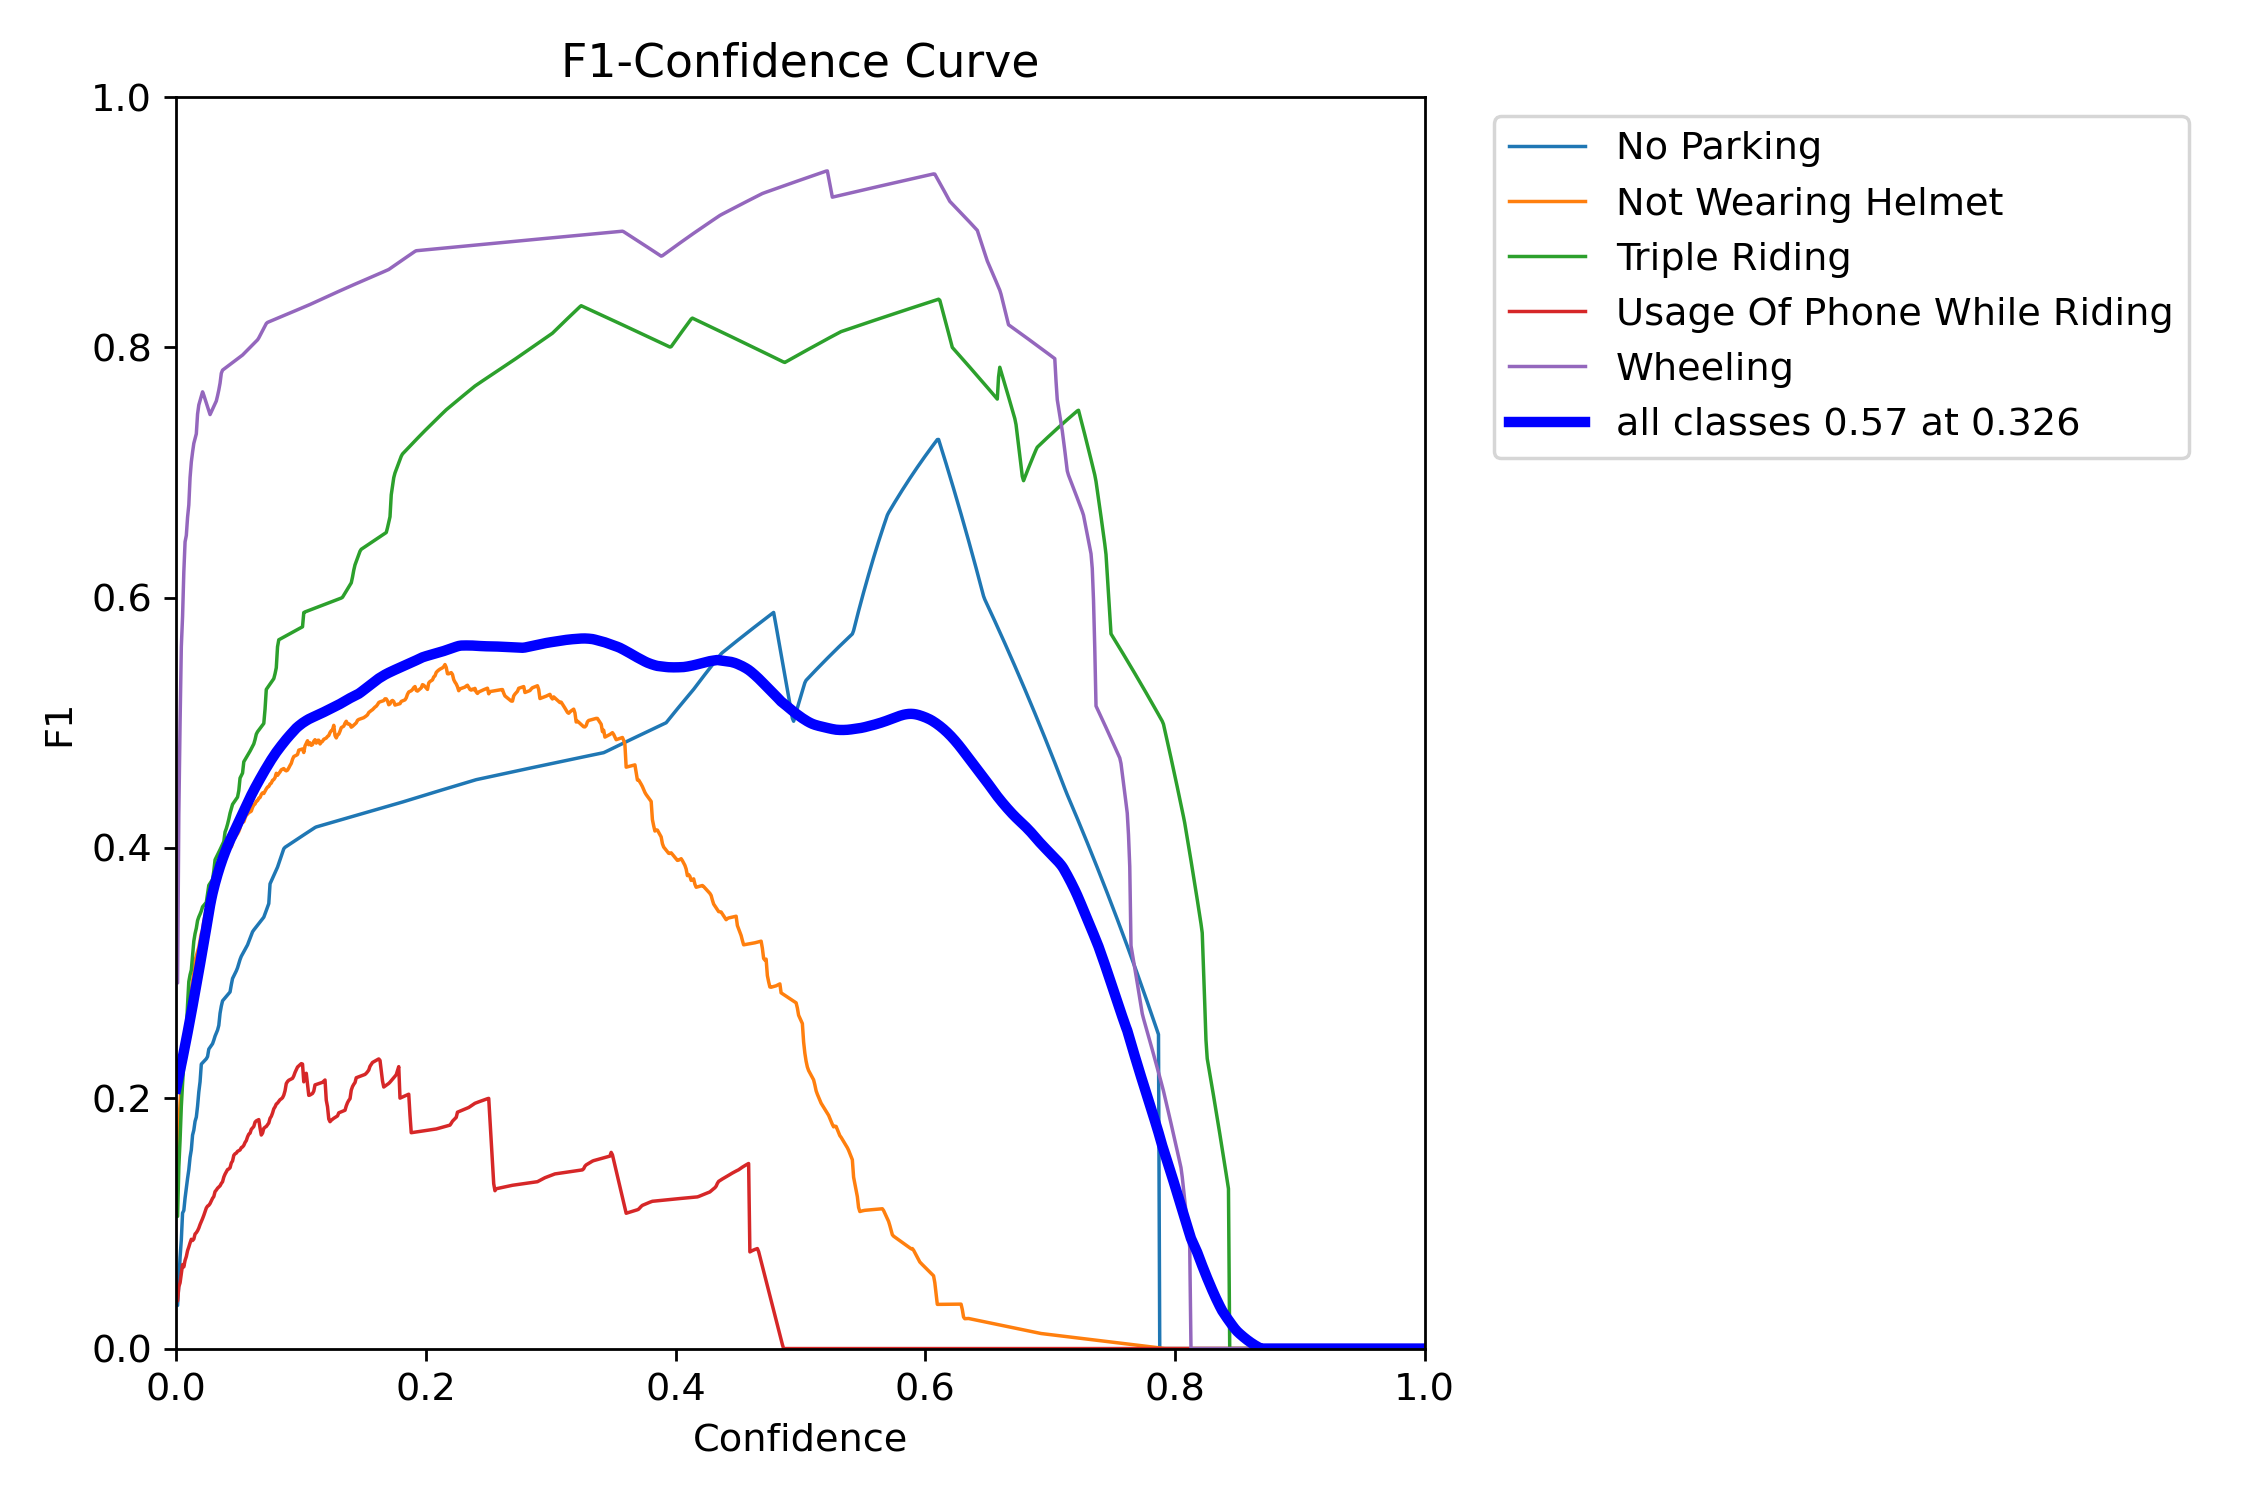

In [11]:
from IPython.display import Image as IPyImage

IPyImage(filename='runs/detect/train/F1_curve.png', width=600)

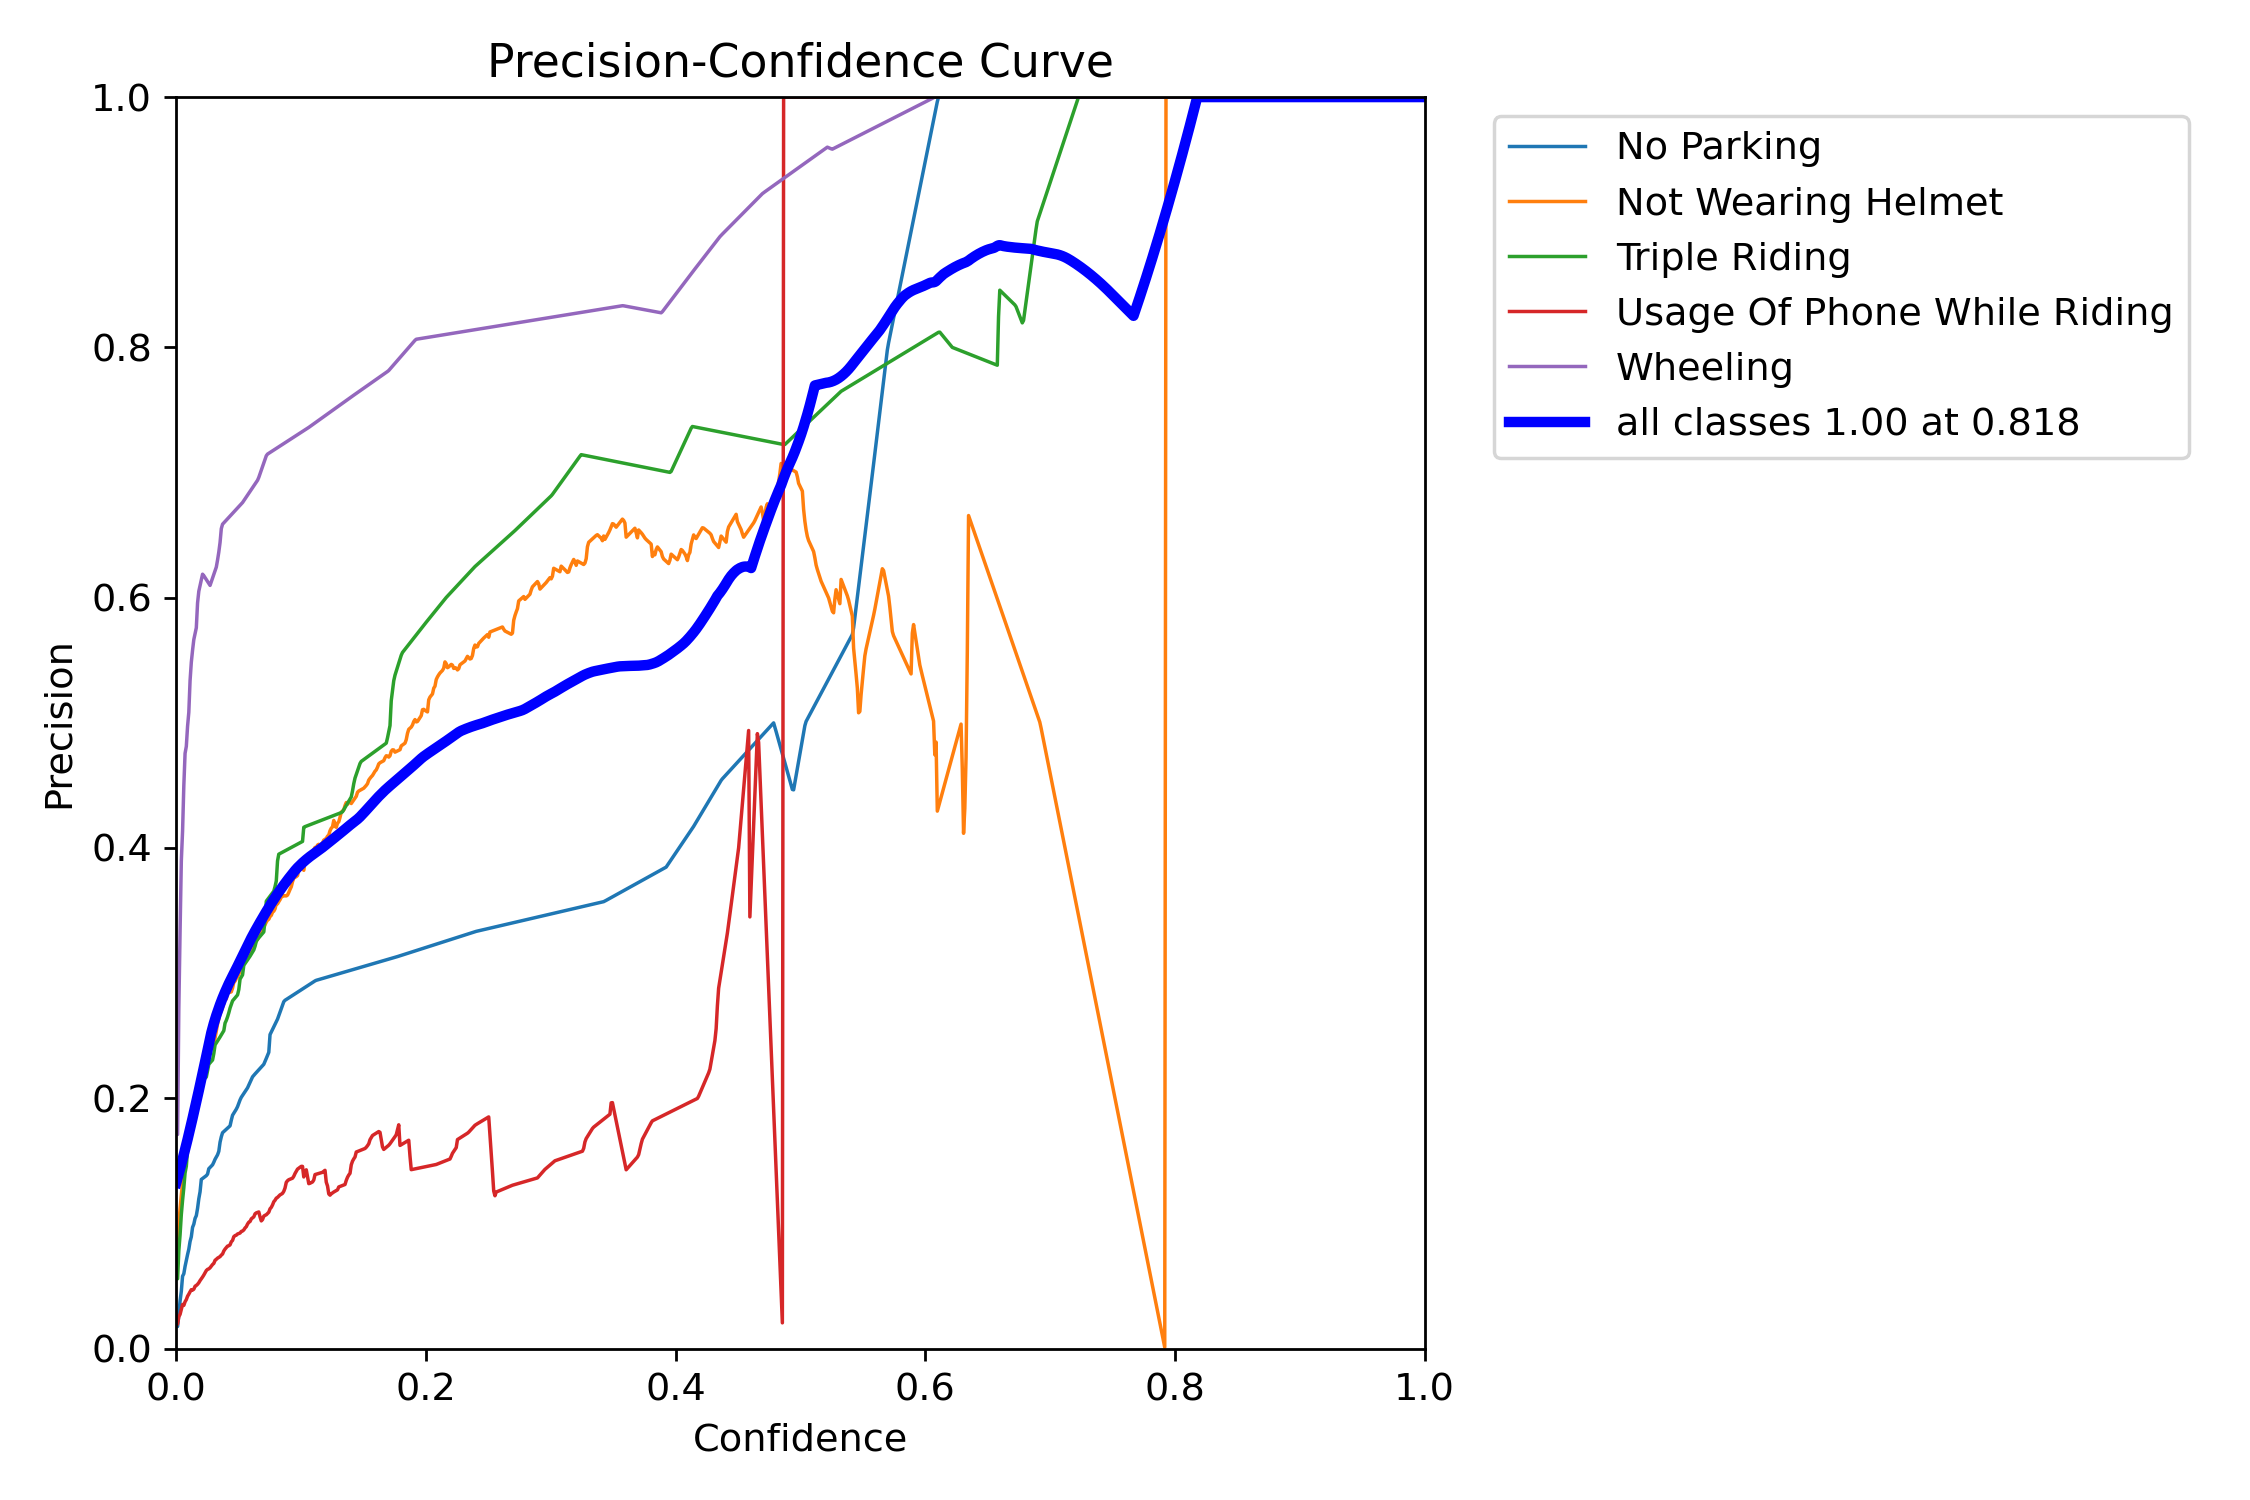

In [12]:
from IPython.display import Image as IPyImage

IPyImage(filename='runs/detect/train/P_curve.png', width=600)

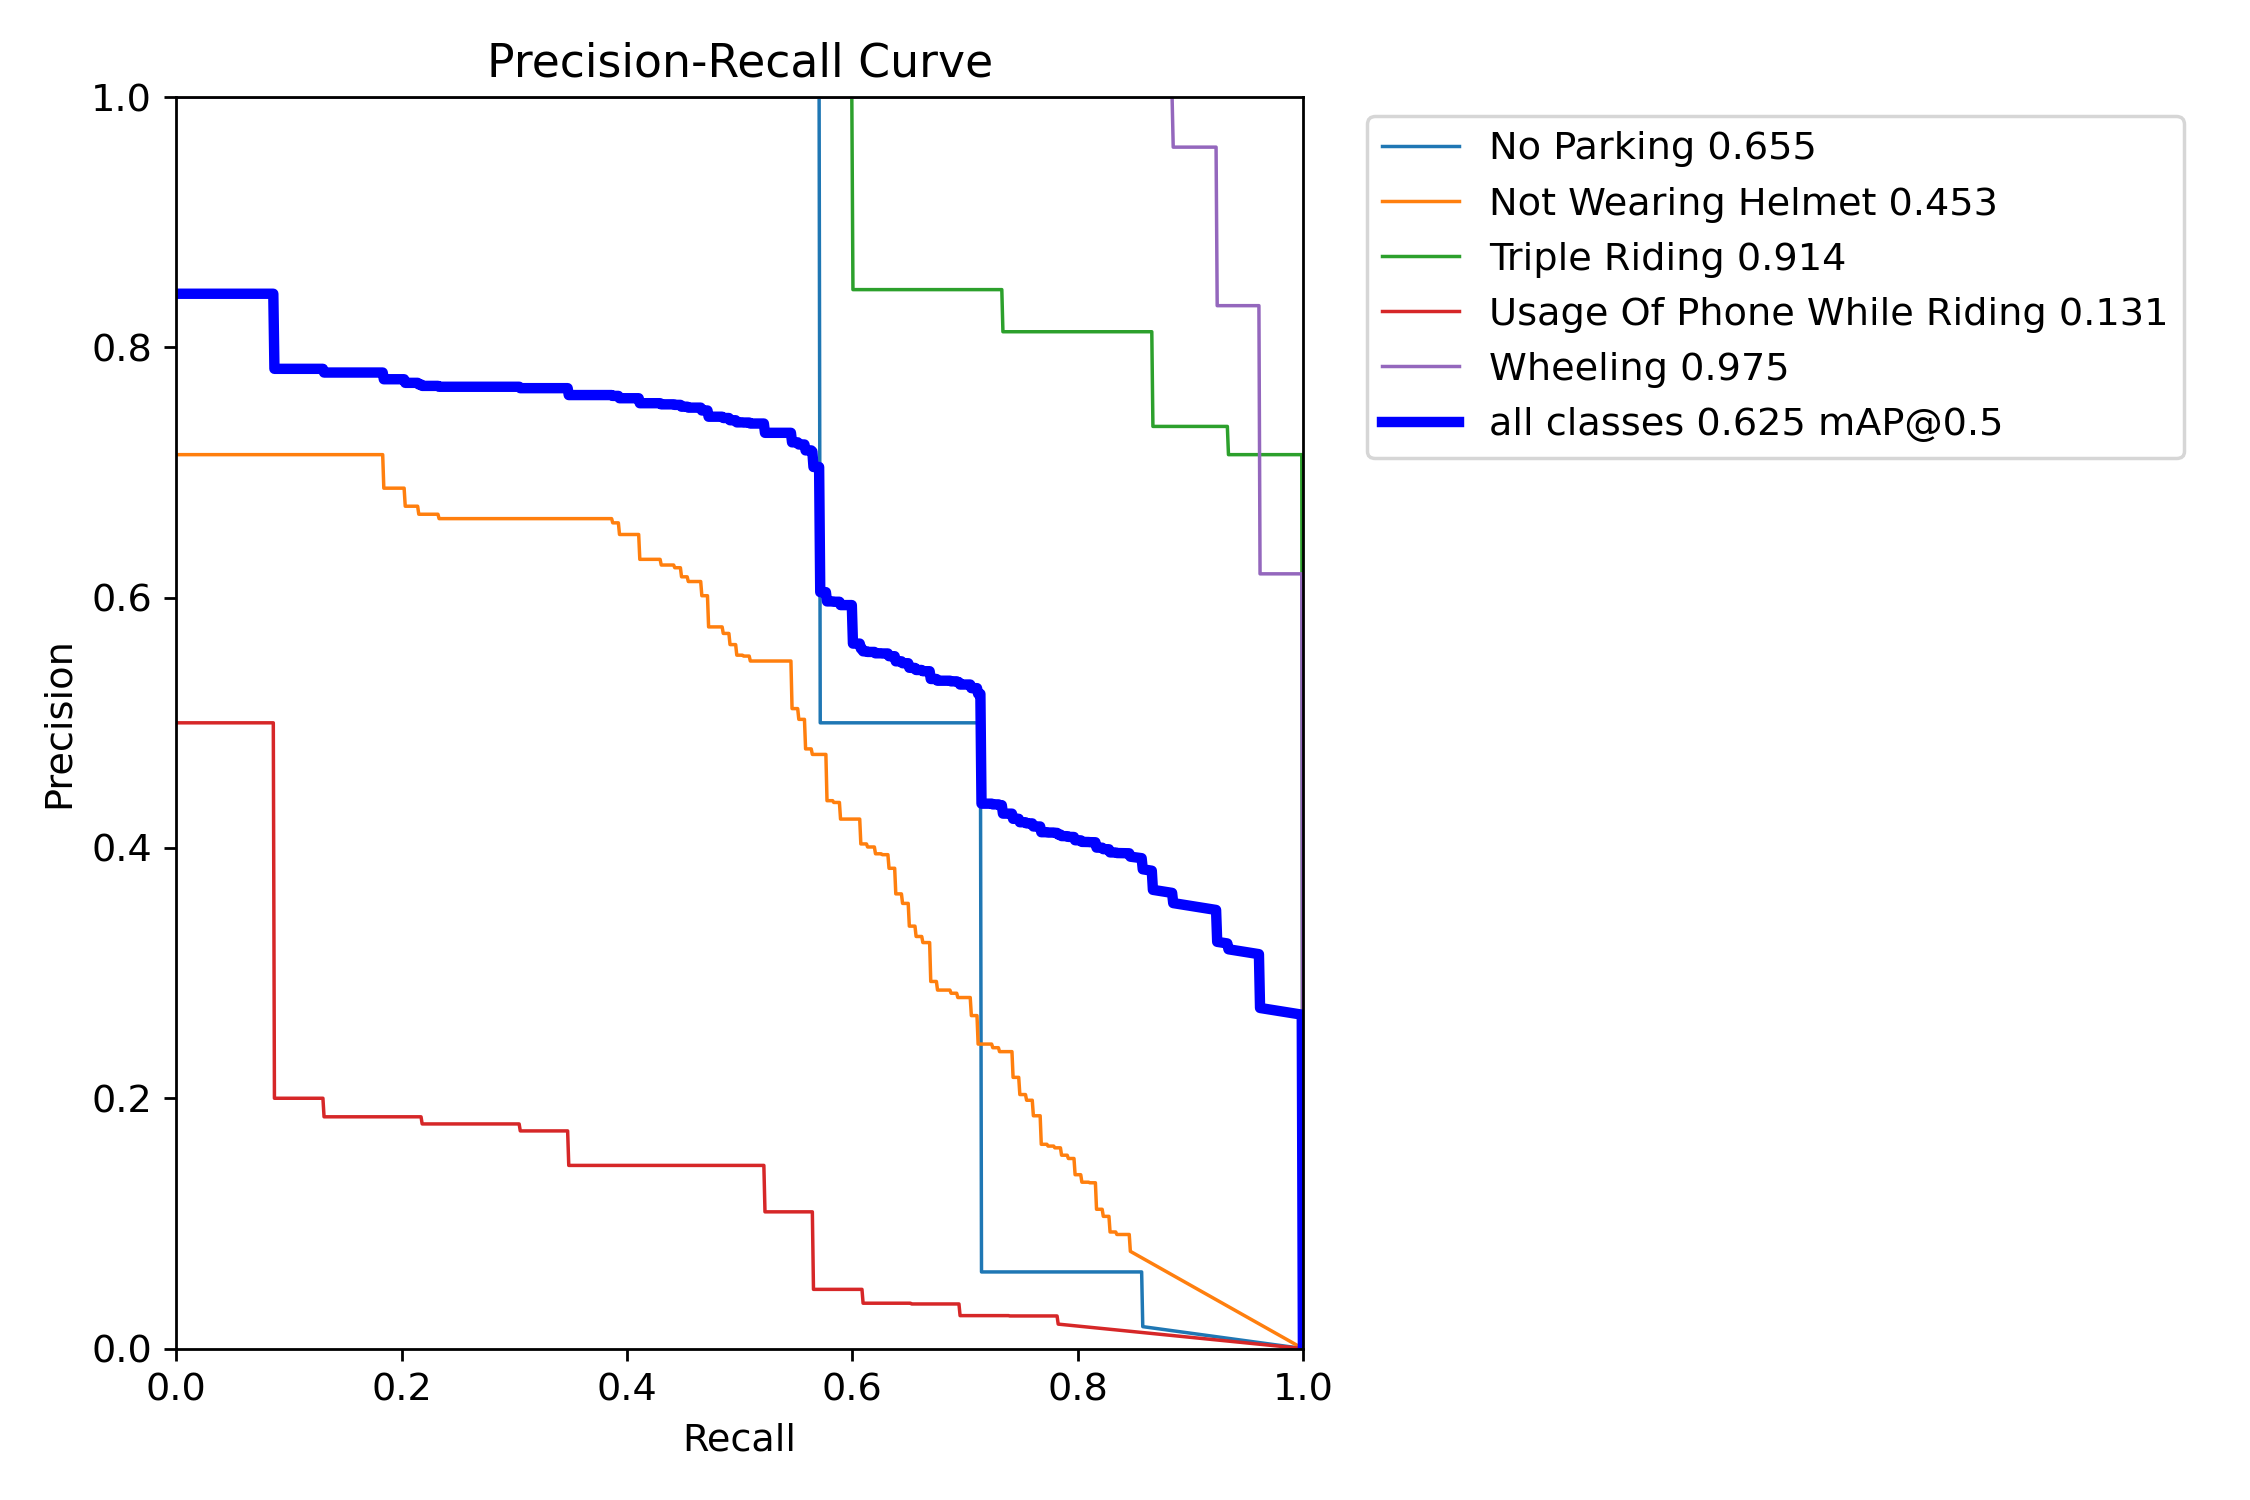

In [13]:
from IPython.display import Image as IPyImage

IPyImage(filename='runs/detect/train/PR_curve.png', width=600)

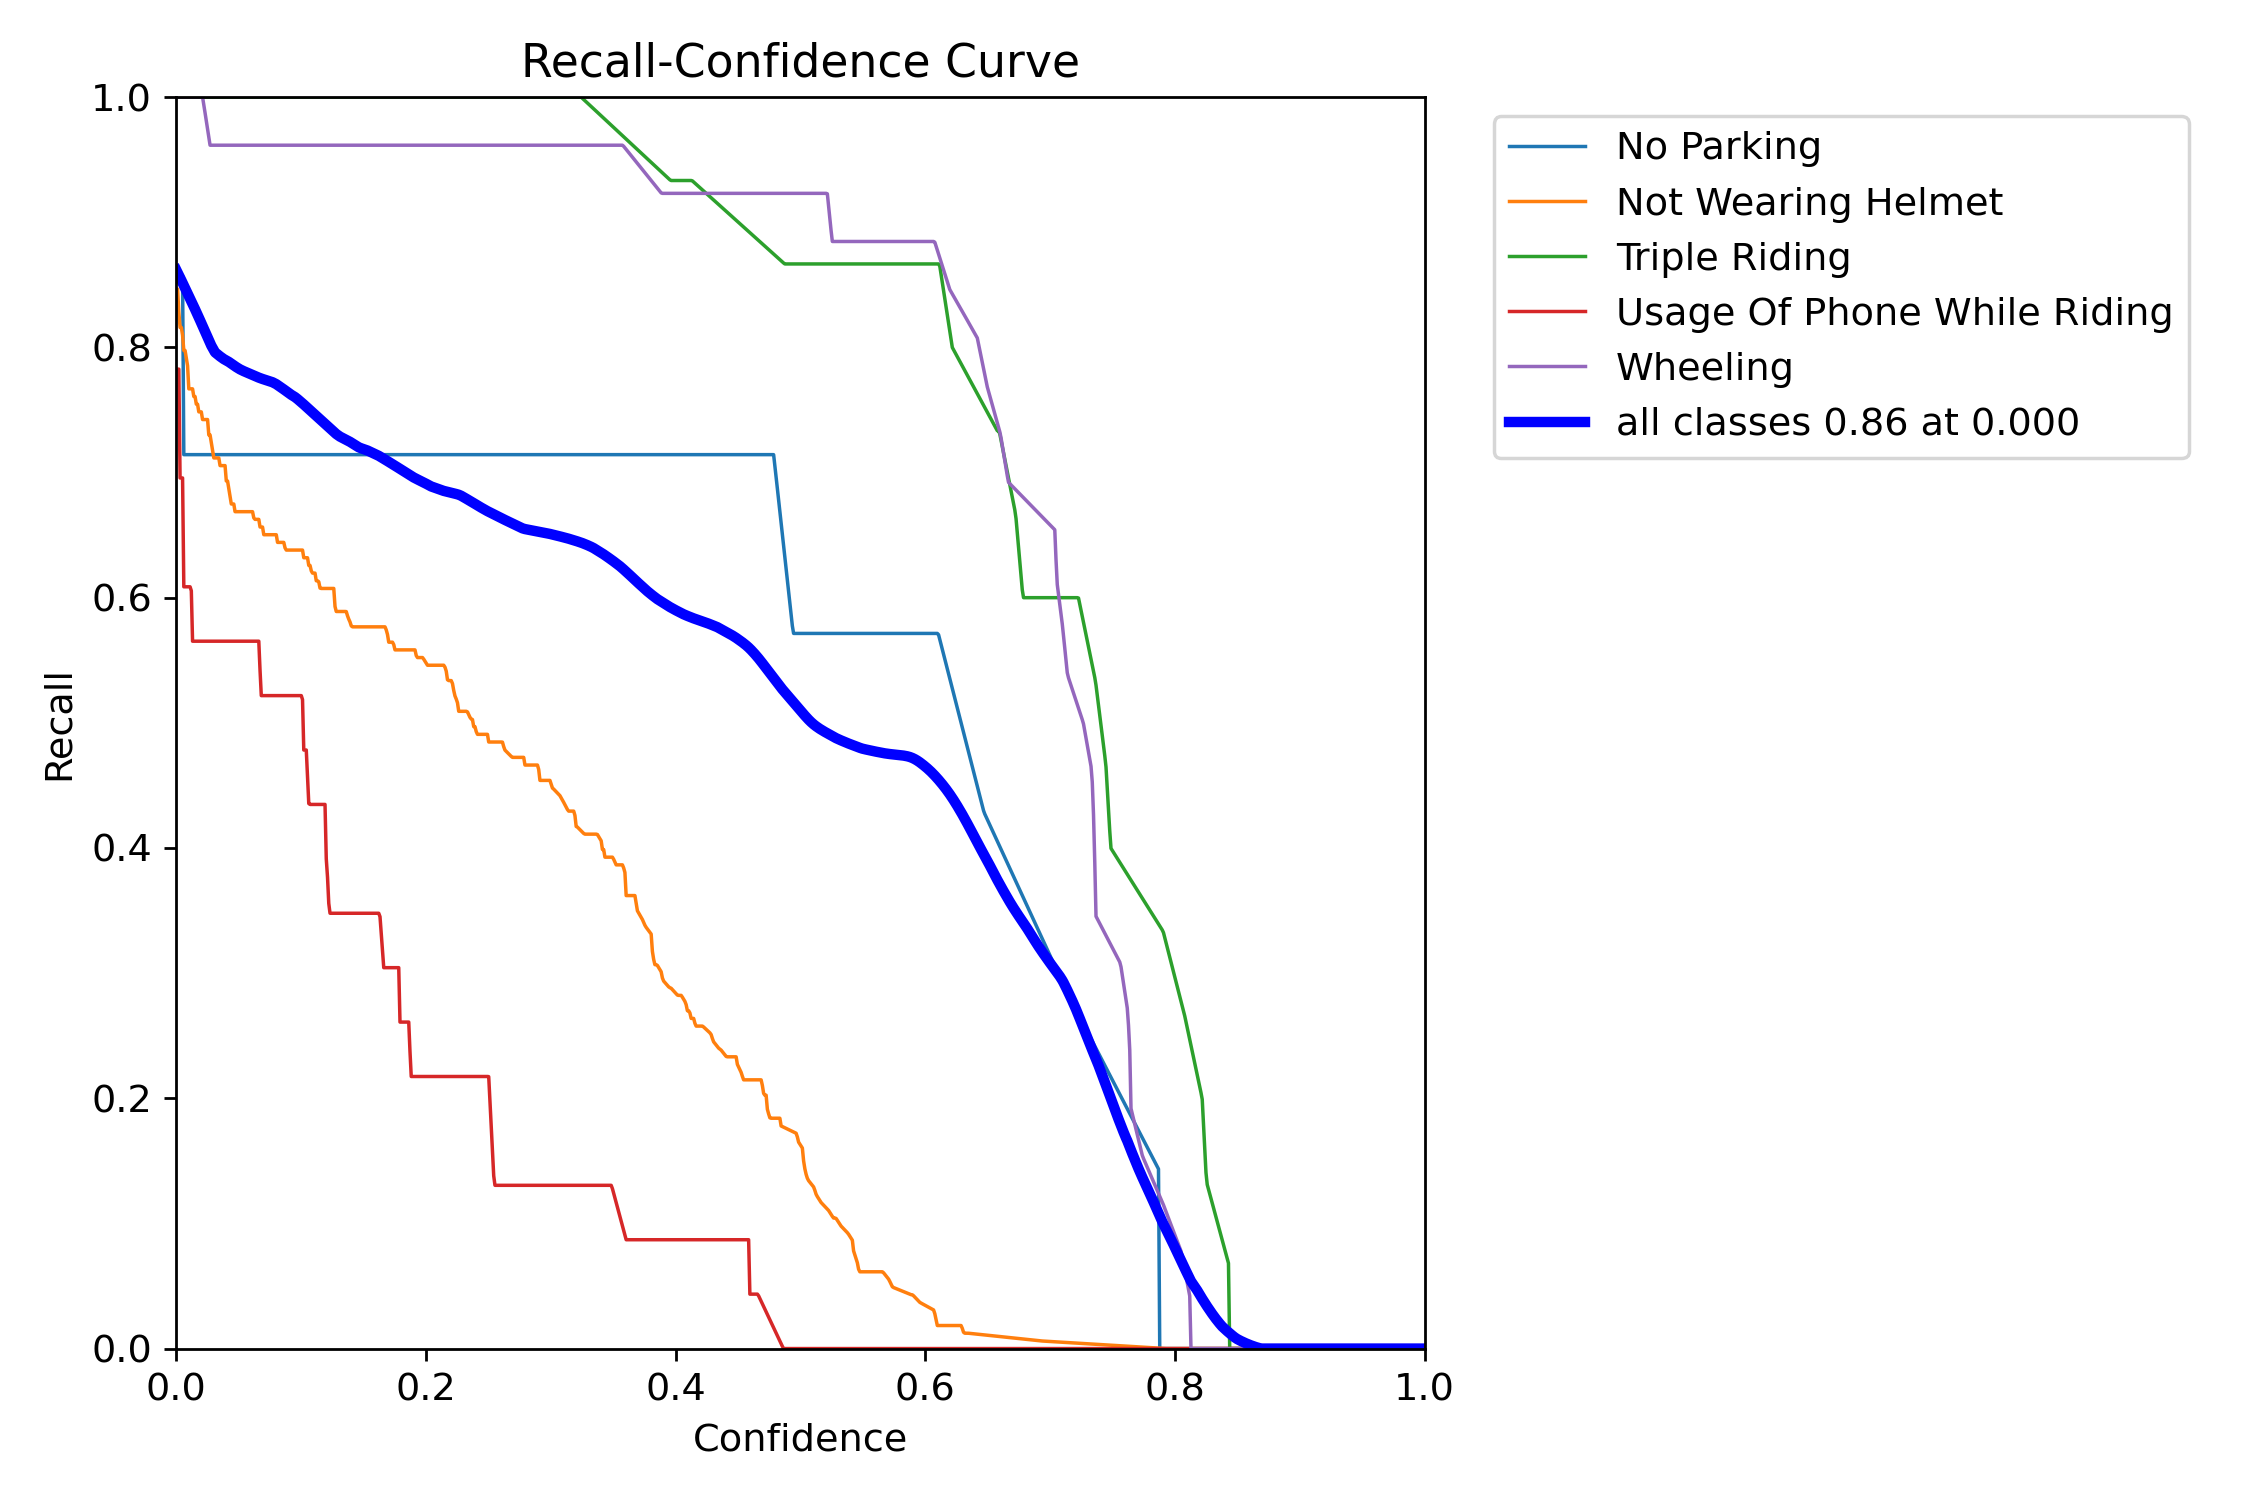

In [14]:
from IPython.display import Image as IPyImage

IPyImage(filename='runs/detect/train/R_curve.png', width=600)

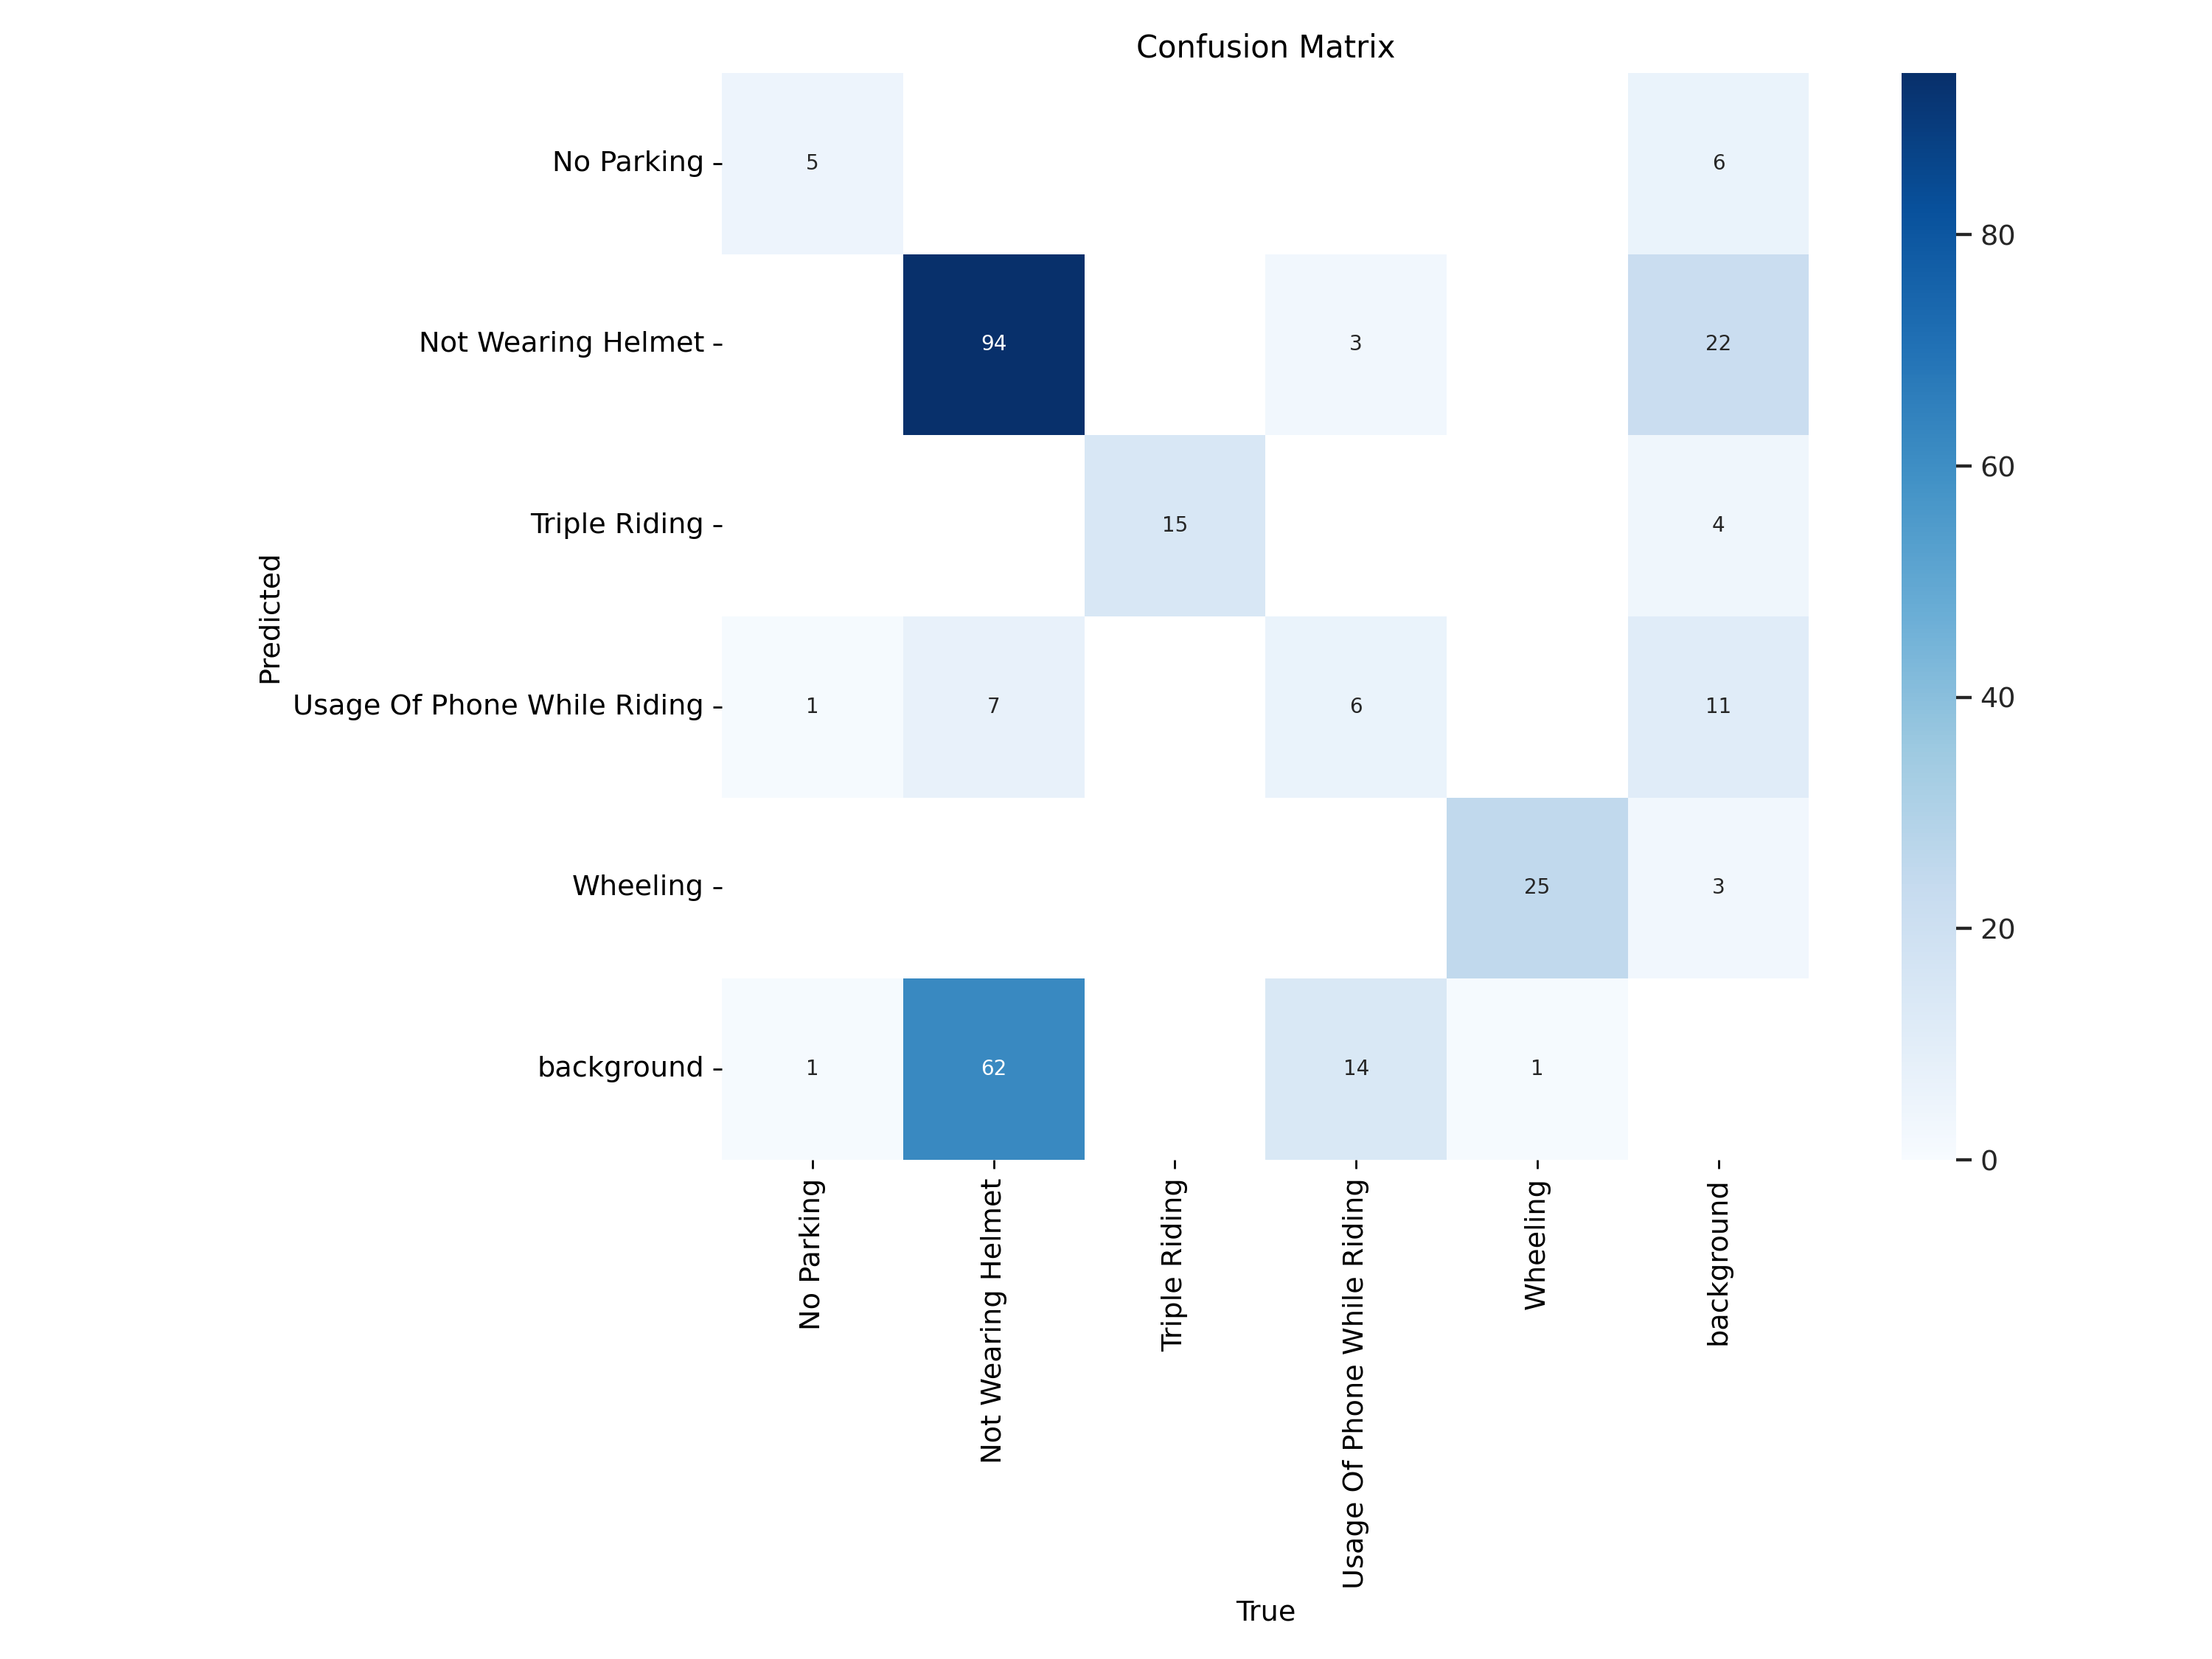

In [15]:
from IPython.display import Image as IPyImage

IPyImage(filename='runs/detect/train/confusion_matrix.png', width=600)

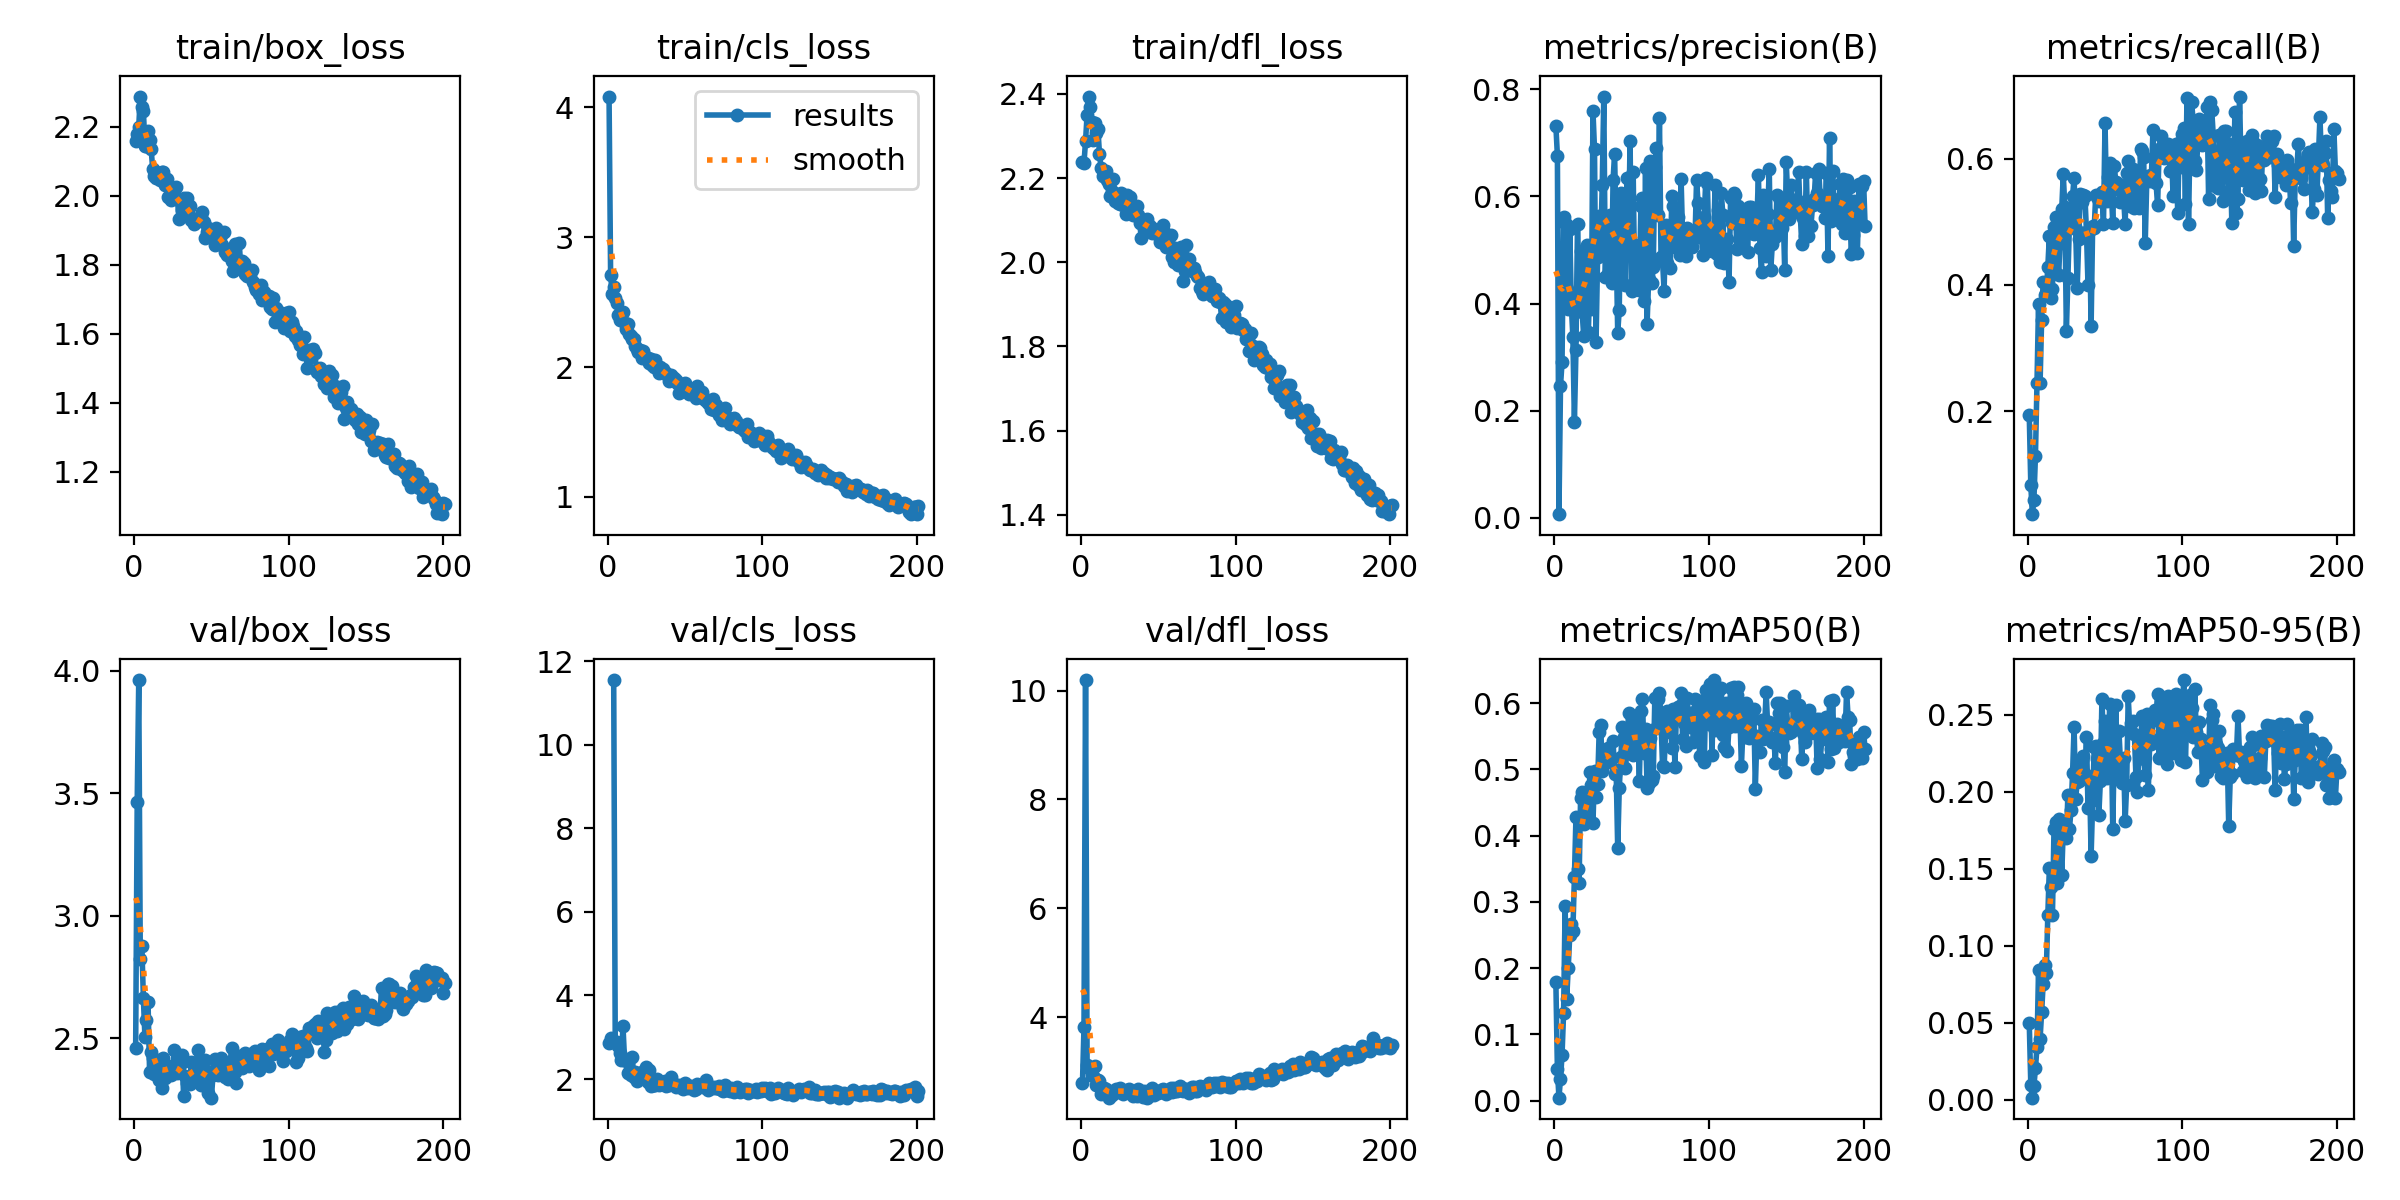

In [16]:
from IPython.display import Image as IPyImage

IPyImage(filename='runs/detect/train/results.png', width=600)

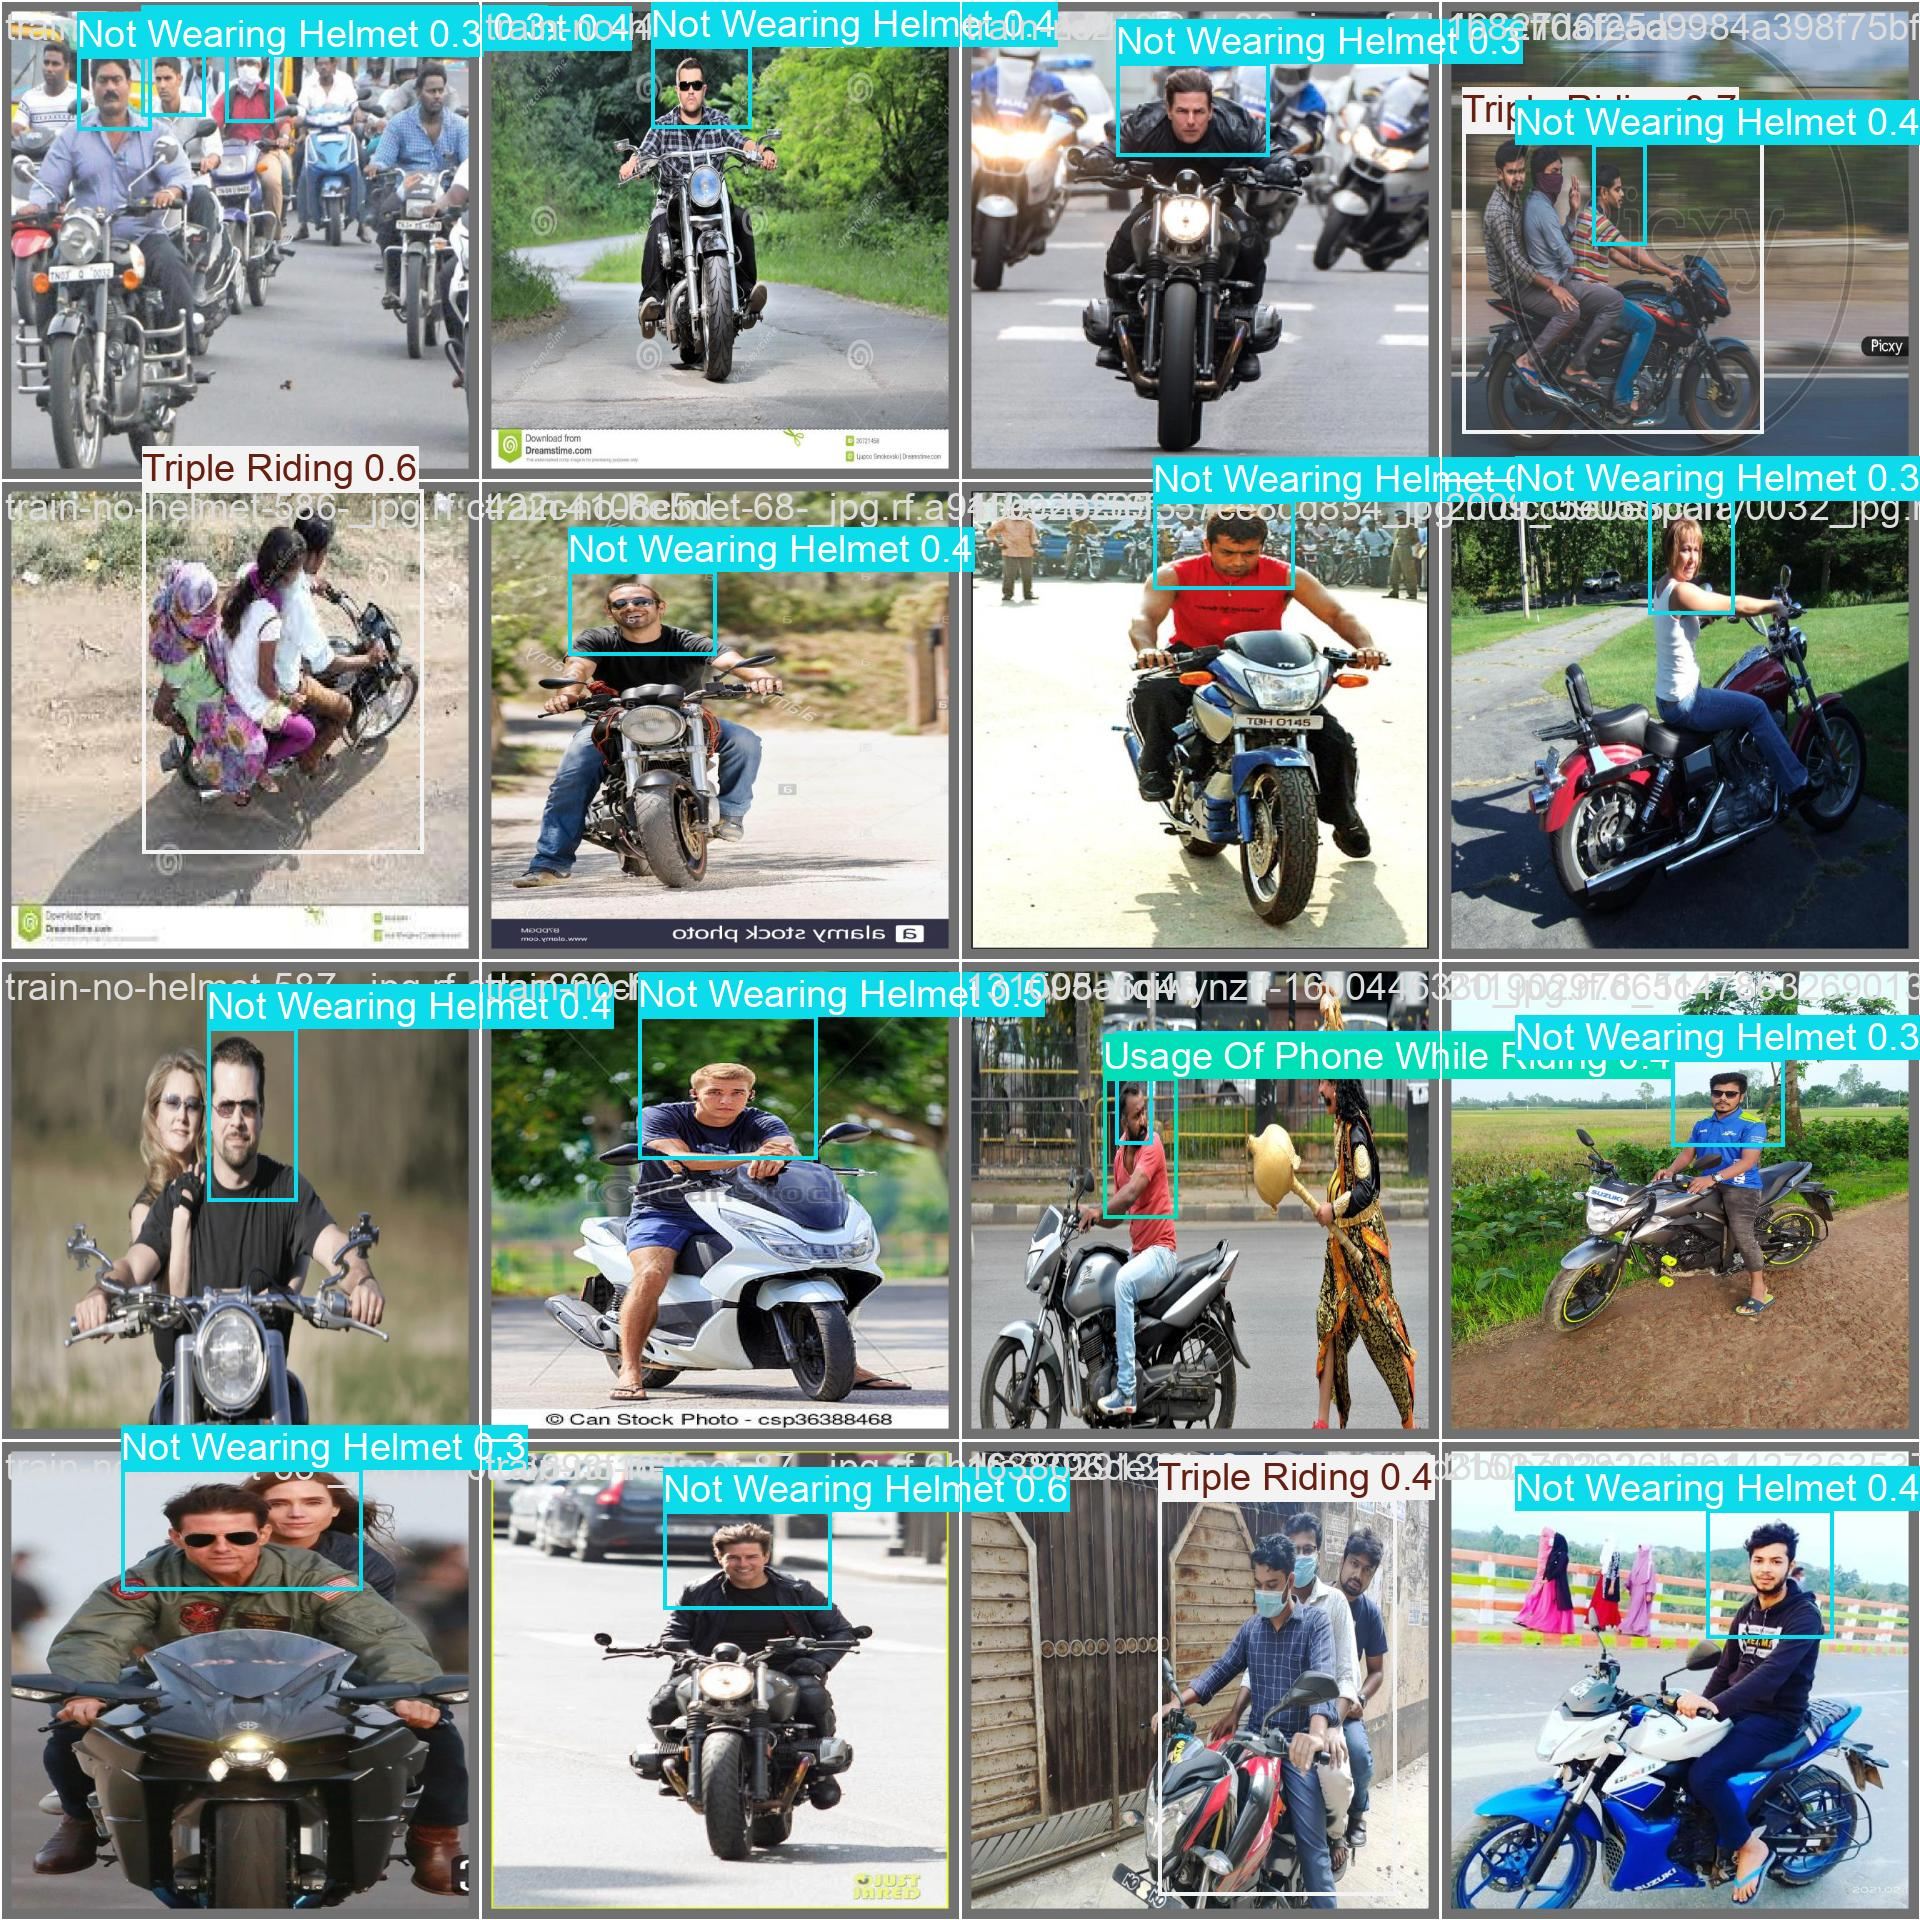

In [17]:
from IPython.display import Image as IPyImage

IPyImage(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

In [22]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=/kaggle/working/dataset/data.yaml


Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11s summary (fused): 238 layers, 9,414,735 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /kaggle/working/dataset/valid/labels.cache... 188 images, 1 backgr
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        188        234      0.527      0.648      0.629      0.273
            No Parking          7          7      0.349      0.714      0.655      0.235
    Not Wearing Helmet        139        163      0.619      0.436      0.453      0.122
         Triple Riding         15         15      0.692          1      0.914      0.485
Usage Of Phone While Riding         23         23      0.152       0.13      0.146     0.0613
              Wheeling         26         26      0.825      0.962      0.976      0.459
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[

In [24]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=/kaggle/working/dataset/valid/images save=True


Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11s summary (fused): 238 layers, 9,414,735 parameters, 0 gradients, 21.3 GFLOPs

image 1/188 /kaggle/working/dataset/valid/images/-two-women-ride-a-motorcycle-with-a-little-boy-sitting-in-the-middle-2CFJK8F_jpg.rf.54ea2c3eb2263e684b5962535eabee7c.jpg: 640x640 1 Triple Riding, 9.9ms
image 2/188 /kaggle/working/dataset/valid/images/119920285_57ce8dd854_jpg.rf.dcc5e0e8cafa866de008659d6fb78d6f.jpg: 640x640 1 Not Wearing Helmet, 9.7ms
image 3/188 /kaggle/working/dataset/valid/images/131095-viqiwynztf-1600446330_jpg.rf.d65cc6b2bb1727fe4804ca4762af3735.jpg: 640x640 1 Not Wearing Helmet, 1 Usage Of Phone While Riding, 9.0ms
image 4/188 /kaggle/working/dataset/valid/images/1638029132149_jpg.rf.2dafd3b0bc92c26b2e473adf4cb72b41.jpg: 640x640 (no detections), 9.0ms
image 5/188 /kaggle/working/dataset/valid/images/1b8eff0af2ad9984a398f75bf67ac1c6_jpg.rf.44acb641e0aea850db430bf9907cae6d.jpg: 640x640 1 No

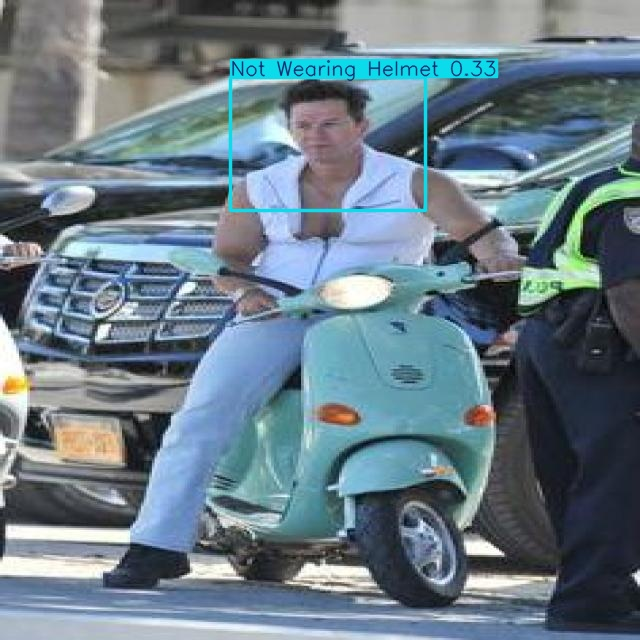

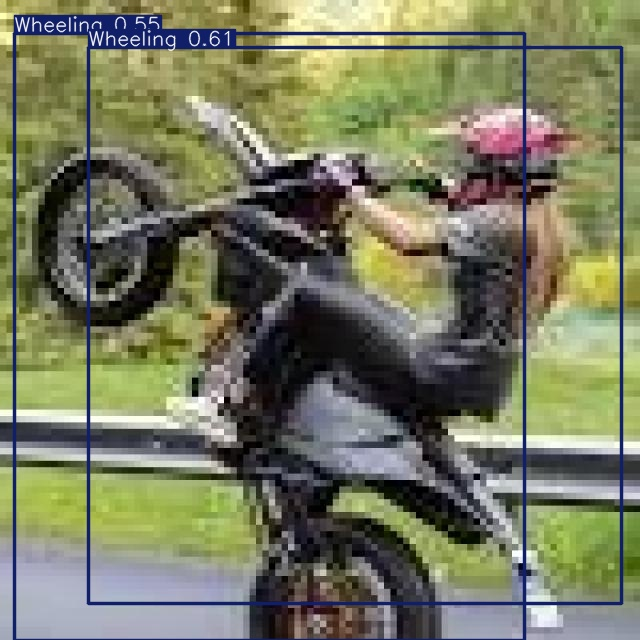

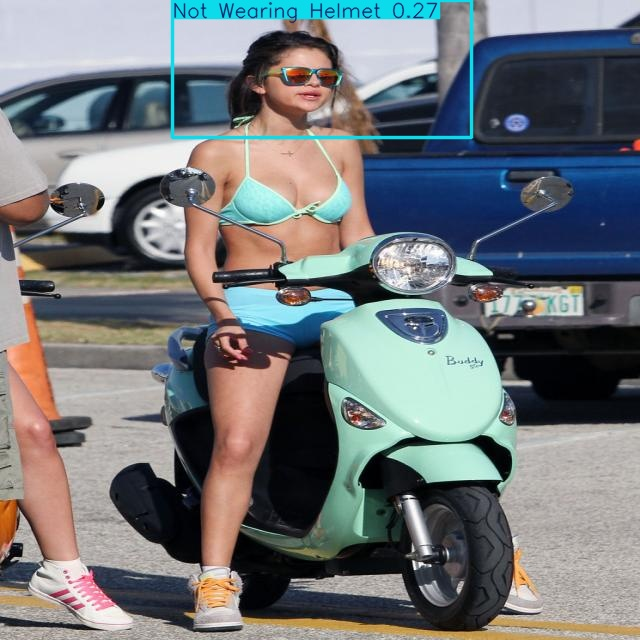

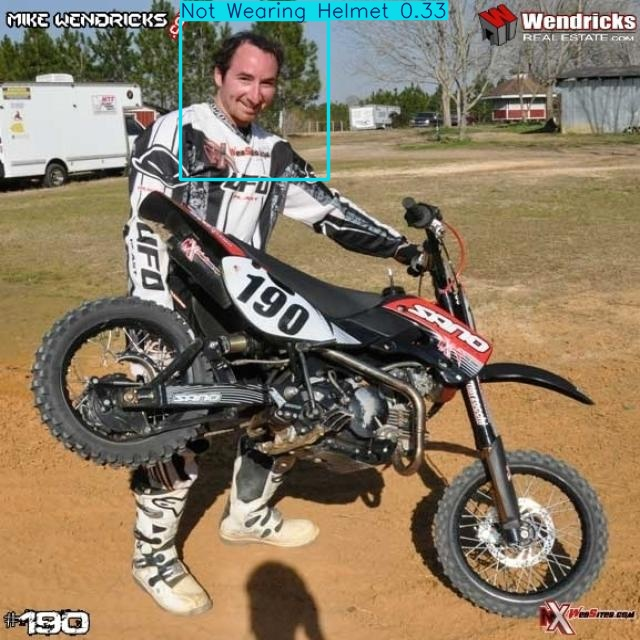

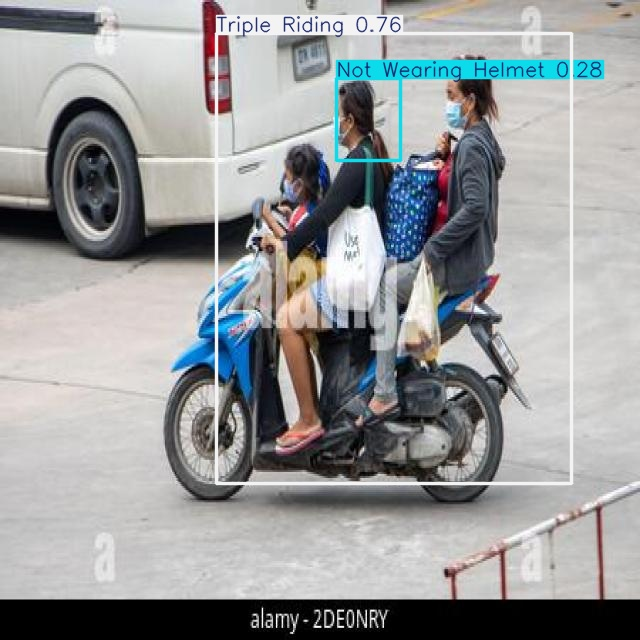

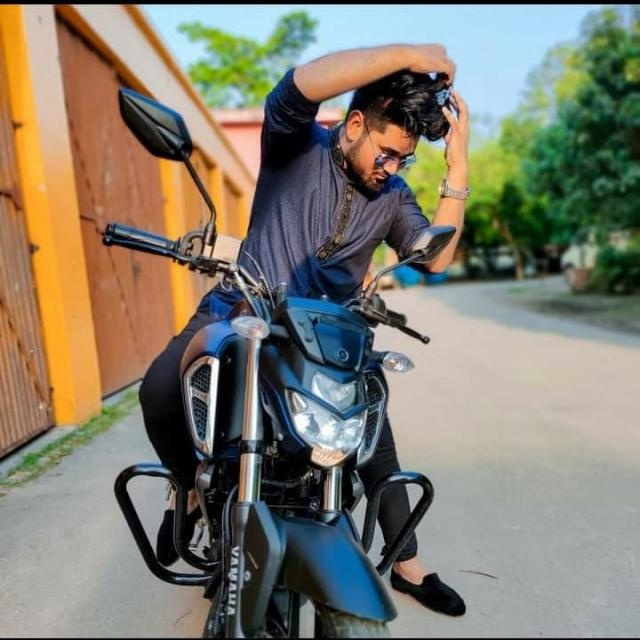

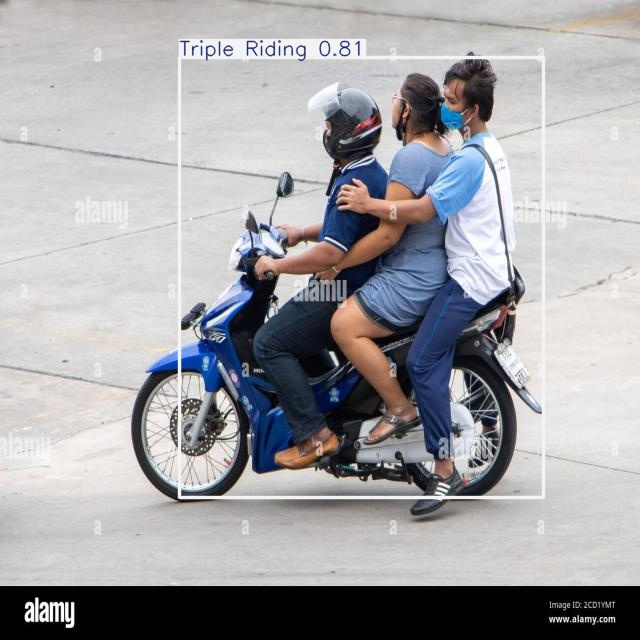

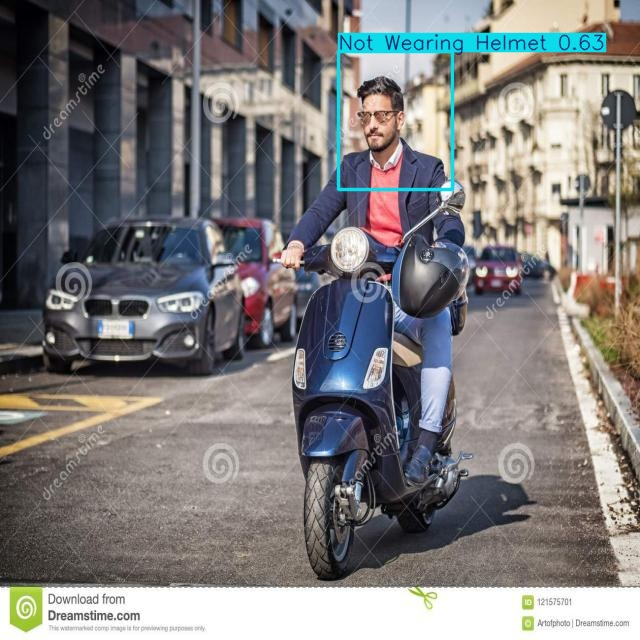

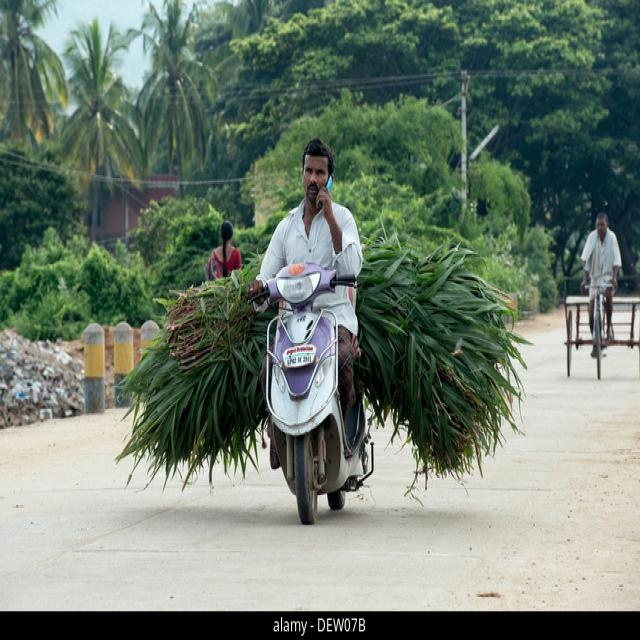

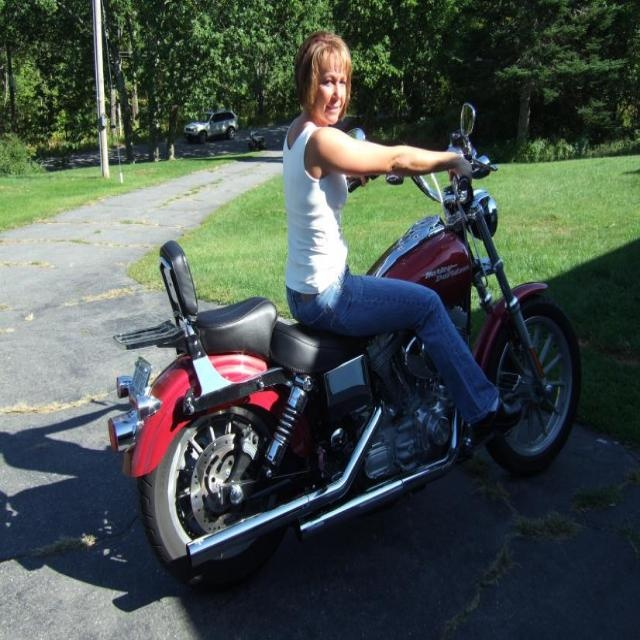

In [25]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:10]:
    display(IPyImage(filename=img, width=600))
    print("\n")